In [3]:
import numpy as np
import polars as pl
import pyadcirc.io.read_fort14 as rf14
from pyadcirc.log import logger
from pyadcirc.msh.ADCIRCMesh import ADCIRCMesh
import importlib

base_mesh_path = '/Users/carlos/repos/GBPP/scenarios/scenario_1/msh/fort.14'
test_mesh_bad= '/Users/carlos/repos/pyadcirc/tests/bad_si/fort.14'
test_mesh = '/Users/carlos/repos/pyadcirc/tests/si/fort.14'
clean_test_mesh = 'fort_modified.14'
mesh_path =  test_mesh 
bad_mesh = test_mesh

importlib.reload(rf14)

<module 'pyadcirc.io.read_fort14' from '/Users/carlos/repos/pyadcirc/src/pyadcirc/io/read_fort14.py'>

In [4]:
msh = ADCIRCMesh(mesh_path)
data = msh.get_data()

In [7]:
data

{'params': {'AGRID': 'Shinnecock Inlet Coarse Grid', 'NE': 5780, 'NP': 3070},
 'node_map': shape: (3_070, 4)
 ┌──────┬────────────┬───────────┬───────────┐
 │ JN   ┆ X          ┆ Y         ┆ DP        │
 │ ---  ┆ ---        ┆ ---       ┆ ---       │
 │ i64  ┆ f64        ┆ f64       ┆ f64       │
 ╞══════╪════════════╪═══════════╪═══════════╡
 │ 3    ┆ -72.046969 ┆ 40.952381 ┆ 20.911768 │
 │ 4    ┆ -72.041922 ┆ 40.933371 ┆ 26.731834 │
 │ 5    ┆ -72.038364 ┆ 40.914063 ┆ 29.506327 │
 │ 6    ┆ -72.035648 ┆ 40.894596 ┆ 32.508915 │
 │ …    ┆ …          ┆ …         ┆ …         │
 │ 3069 ┆ -72.586352 ┆ 40.818835 ┆ 1.5       │
 │ 3070 ┆ -72.589697 ┆ 40.813418 ┆ 1.5       │
 │ 1    ┆ 3.0        ┆ 77.0      ┆ 76.0      │
 │ 2    ┆ 3.0        ┆ 76.0      ┆ 2.0       │
 └──────┴────────────┴───────────┴───────────┘,
 'element_map': shape: (5_780, 14)
 ┌──────┬─────┬──────┬──────┬───┬───────────┬────────────┬───────────┬───────────┐
 │ JE   ┆ NHY ┆ NM_1 ┆ NM_2 ┆ … ┆ DP_2      ┆ X_3        ┆ Y_3     

In [9]:
dir(msh._f['data'])

['_Future__get_result',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_condition',
 '_done_callbacks',
 '_exception',
 '_invoke_callbacks',
 '_result',
 '_state',
 '_waiters',
 'add_done_callback',
 'cancel',
 'cancelled',
 'done',
 'exception',
 'result',
 'running',
 'set_exception',
 'set_result',
 'set_running_or_notify_cancel']

In [4]:
logger.enable('pyadcirc')
res = rf14.load_f14(mesh_path)
res

2023-09-30 16:57:43.687 | INFO     | pyadcirc.io.read_fort14:load_f14:346 - Getting AGRID, NP, NE for fort.14 file at fort_modified.14...
2023-09-30 16:57:43.705 | INFO     | pyadcirc.io.read_fort14:load_f14:348 - Mesh params: {'AGRID': 'OceanMesh2D', 'NE': 14822134, 'NP': 7469978}
2023-09-30 16:57:43.706 | INFO     | pyadcirc.io.read_fort14:load_f14:350 - Building raw data query...
2023-09-30 16:57:43.719 | INFO     | pyadcirc.io.read_fort14:load_f14:353 - Validating fort.14 file...
2023-09-30 16:57:43.724 | INFO     | pyadcirc.io.read_fort14:load_f14:359 - raw_data query: {raw_data_q}
Loading...


2023-09-30 16:57:47.702 | INFO     | pyadcirc.io.read_fort14:load_f14:361 - Done loading raw data: {raw_data}
2023-09-30 16:57:47.705 | INFO     | pyadcirc.io.read_fort14:load_f14:363 - Loading node map with {params["NP"]} nodes...
2023-09-30 16:57:47.711 | INFO     | pyadcirc.io.read_fort14:load_f14:369 - Node map query: {node_map_q}
Loading...
2023-09-30 16:57:47.790 | INFO     | pyadcirc.io.read_fort14:load_f14:371 - Done loading node map: {node_map}
2023-09-30 16:57:47.790 | INFO     | pyadcirc.io.read_fort14:load_f14:373 - Building query for map with {params["NE"]} element...
2023-09-30 16:57:47.795 | INFO     | pyadcirc.io.read_fort14:load_f14:380 - Element map query: naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

INNER JOIN:
LEFT PLAN ON: [col("NM_3")]
  INNER JOIN:
  LEFT PLAN ON: [col("NM_2")]
    INNER JOIN:
    LEFT PLAN ON: [col("NM_1")]
       SELECT [col("column_1").alias("JE").strict_cast(Int64), col("column_2").alias("NHY").strict_cast(In

{'params': {'AGRID': 'OceanMesh2D', 'NE': 14822134, 'NP': 7469978},
 'node_map': shape: (7_469_978, 4)
 ┌─────────┬────────────┬────────────┬────────────┐
 │ JN      ┆ X          ┆ Y          ┆ DP         │
 │ ---     ┆ ---        ┆ ---        ┆ ---        │
 │ i64     ┆ f64        ┆ f64        ┆ f64        │
 ╞═════════╪════════════╪════════════╪════════════╡
 │ 3       ┆ -91.661568 ┆ 30.717286  ┆ -11.229315 │
 │ 4       ┆ -91.660904 ┆ 30.715791  ┆ -9.406327  │
 │ 5       ┆ -91.661486 ┆ 30.715298  ┆ -11.048312 │
 │ 6       ┆ -91.661598 ┆ 30.717949  ┆ -10.810918 │
 │ …       ┆ …          ┆ …          ┆ …          │
 │ 7469977 ┆ -90.099405 ┆ 30.024402  ┆ 0.3        │
 │ 7469978 ┆ -90.098937 ┆ 30.024217  ┆ 0.3        │
 │ 1       ┆ 3.0        ┆ 7.170526e6 ┆ 7.170527e6 │
 │ 2       ┆ 3.0        ┆ 7.169817e6 ┆ 7.169096e6 │
 └─────────┴────────────┴────────────┴────────────┘,
 'element_map': shape: (14_822_134, 14)
 ┌──────────┬─────┬─────────┬─────────┬───┬───────────┬────────────┬────────

## Getting base params

In [14]:
params = rf14.get_base_params(mesh_path)
params

params

{'AGRID': 'OceanMesh2D', 'NE': 14822134, 'NP': 7469978}

## Raw Data

In [15]:
raw_data_q = rf14.get_raw_data_q(mesh_path)

In [16]:
print(raw_data_q.explain(optimized=True))


  Csv SCAN fort_modified.14
  PROJECT */8 COLUMNS


In [17]:
raw_data_q.fetch(1)

column_1,column_2,column_3,column_4,column_5
f64,f64,f64,f64,f64
1.0,-91.661511,30.715961,-11.397232,null


In [18]:
type(raw_data_q) == pl.LazyFrame

True

### Cleaning fort.14 file

In order for polars parsing to work, we need fort.14 files to be strictly space deliminated. 
We proceed if necessary to clean the file by replacing all collections of multiple whitespaces with a single whitespace. We use a sed operation for this to be fast.
We can clean the file in place or create a new file. 
Note removing mutiple spaces can reduce the file size a bit as well since it's stored in plain text.

In [19]:
np.isnan(raw_data_q.select(pl.col("column_1")).fetch(1).to_numpy()[0][0])


False

In [20]:
bad_raw_data_q = rf14.get_raw_data_q(bad_mesh)

In [21]:
if np.isnan(bad_raw_data_q.select(pl.col("column_1")).fetch(1).to_numpy()[0][0]):
    print('Uncomment to clean file!')
    # clean_file(mesh_path, in_place=False)

Uncomment to clean file!


### Loading all the data

In [22]:
raw_data = raw_data_q.collect()
raw_data

column_1,column_2,column_3,column_4,column_5
f64,f64,f64,f64,f64
1.0,-91.661511,30.715961,-11.397232,null
2.0,-91.661541,30.716624,-11.234054,null
3.0,-91.661568,30.717286,-11.229315,null
4.0,-91.660904,30.715791,-9.406327,null
5.0,-91.661486,30.715298,-11.048312,null
6.0,-91.661598,30.717949,-10.810918,null
7.0,-91.660819,30.716628,-9.504081,null
8.0,-91.660775,30.717449,-9.677403,null
9.0,-91.660169,30.716005,-8.422121,null


In [24]:
type(raw_data) == pl.DataFrame

True

### Query draft

Below is the query for the full fort.14 raw data as it stands now

In [25]:
raw_data_lf = pl.scan_csv(
    mesh_path,
    has_header=False,
    separator=" ",
    skip_rows=2,
    schema=dict([(f"column_{i}", pl.Float64) for i in range(8)]),
    comment_char="=",
    truncate_ragged_lines=True,
    ignore_errors=True,
)
raw_data_q = (raw_data_lf)
raw_data_q

<LazyFrame [8 cols, {"column_0": Float64 … "column_7": Float64}] at 0x15E5C5190>

In [26]:
raw_data_q.fetch(1)

column_1,column_2,column_3,column_4,column_5
f64,f64,f64,f64,f64
1.0,-91.661511,30.715961,-11.397232,null


### Graph Viz of Queries

Currently not working

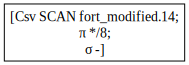

In [30]:
# Nead graphviz installed and it's notinstalling for some reason via pip
raw_data_q.show_graph(optimized=True)

## Node Map

Maps node elements to their bathymetry

In [43]:
node_map_q = rf14.get_node_map_q(params=params, raw_data=raw_data_q)
node_map_q

<LazyFrame [4 cols, {"JN": Int64 … "DP": Float64}] at 0x2FE1A9090>

In [44]:
node_map = node_map_q.collect()
node_map

JN,X,Y,DP
i64,f64,f64,f64
3,-91.661568,30.717286,-11.229315
4,-91.660904,30.715791,-9.406327
5,-91.661486,30.715298,-11.048312
6,-91.661598,30.717949,-10.810918
7,-91.660819,30.716628,-9.504081
8,-91.660775,30.717449,-9.677403
9,-91.660169,30.716005,-8.422121
10,-91.660675,30.715094,-9.189757
11,-91.66146,30.714635,-10.776675


### Filtering node inside bbox

Can specifiy a variety of types for the bbox.

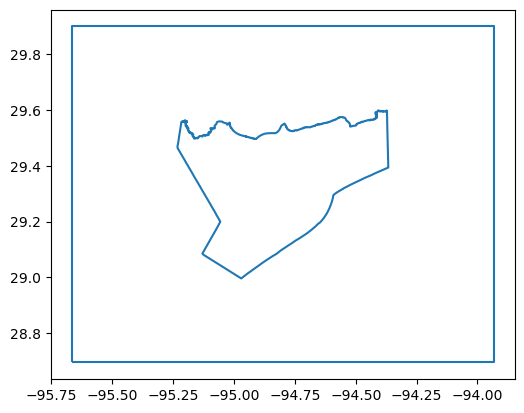

In [45]:
import osmnx as ox
import matplotlib.pyplot as plt
from pyadcirc.io.shapefiles import get_bbox_poly

# Get the polygon geometries for the area
gdf = ox.geocode_to_gdf("Galveston, Texas")

# bbox = get_bbox_poly(bbox='Galveston', factor=2)
bbox = get_bbox_poly(bbox=gdf, factor=2)

# Plot the network

ax = gdf.boundary.plot()
bbox.boundary.plot(ax=ax)
plt.show()

minx, miny, maxx, maxy = bbox.total_bounds

In [51]:
node_map_galveston_q = rf14.get_node_map_q(mesh_path, bbox="Galveston")
node_map_galveston_q

<LazyFrame [4 cols, {"JN": Int64 … "DP": Float64}] at 0x15E504750>

In [52]:
node_map = node_map_galveston_q.collect()
node_map

JN,X,Y,DP
i64,f64,f64,f64
1007540,-95.021194,29.613786,14.573607
1017615,-95.021607,29.613562,15.430179
1017616,-95.020696,29.613685,14.44247
1017617,-95.020194,29.613689,14.349404
1017618,-95.021089,29.613338,15.631113
1017619,-95.023414,29.612793,15.677468
1017620,-95.023855,29.612466,15.568838
1017655,-95.022877,29.613215,15.744963
1017656,-95.022162,29.613386,15.665555


### Raw Queries

In [53]:
raw_data_q.slice(0, params["NP"]).select(
    [
        pl.col("column_1").alias("JN").cast(pl.Int64),
        pl.col("column_2").alias("X").cast(pl.Float64),
        pl.col("column_3").alias("Y").cast(pl.Float64),
        pl.col("column_4").alias("DP").cast(pl.Float64),
    ]
)

<LazyFrame [4 cols, {"JN": Int64 … "DP": Float64}] at 0x2FE4953D0>

In [54]:
node_map_bbox_lf = raw_data_q.slice(0, params["NP"]).select(
    [
        pl.col("column_1").alias("JN").cast(pl.Int64),
        pl.col("column_2").alias("X").cast(pl.Float64),
        pl.col("column_3").alias("Y").cast(pl.Float64),
        pl.col("column_4").alias("DP").cast(pl.Float64),
    ]).filter(
        pl.col("X") >= minx
    ).filter(
        pl.col("X") <= maxx
    ).filter(
        pl.col("Y") >= miny
    ).filter(
        pl.col("Y") <= maxy
    )
node_map_bbox_lf

<LazyFrame [4 cols, {"JN": Int64 … "DP": Float64}] at 0x2FE497250>

## Element Map

Map of triangular elements.
We can parse the nodal info into the element map as well for ease of access.

In [59]:
raw_data_q, node_map_q, element_map_q = rf14.get_element_map_q(mesh_path, bbox="Galveston", return_all=True)
element_map_q

<LazyFrame [14 cols, {"JE": Int64 … "DP_3": Float64}] at 0x2FD6A4590>

### Raw Queries

For debugging

In [64]:
# Assuming element_map and node_map are Polars DataFrames
cols = ["JN", "X", "Y", "DP"]
element_map_bbox_lf = raw_data_q.slice(params["NP"], params["NE"]).select(
    [
        pl.col("column_1").alias("JE").cast(pl.Int64),
        pl.col("column_2").alias("NHY").cast(pl.Int64),
        pl.col("column_3").alias("NM_1").cast(pl.Int64),
        pl.col("column_4").alias("NM_2").cast(pl.Int64),
        pl.col("column_5").alias("NM_3").cast(pl.Int64),
    ]).join(
        node_map_galveston_q.select(cols),
        left_on="NM_1",
        right_on="JN",
        suffix="_1",
    ).join(
        node_map_galveston_q.select(cols),
        left_on="NM_2",
        right_on="JN",
        suffix="_2",
    ).join(
        node_map_galveston_q.select(cols),
        left_on="NM_3",
        right_on="JN",
        suffix="_3",
    )
element_map_bbox_lf


<LazyFrame [14 cols, {"JE": Int64 … "DP_3": Float64}] at 0x2FEDB0150>

In [65]:
elements_in_bbox = element_map_bbox_lf.collect()
elements_in_bbox

JE,NHY,NM_1,NM_2,NM_3,X,Y,DP,X_2,Y_2,DP_2,X_3,Y_3,DP_3
i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
369610,3,3600258,3564310,3564311,-95.000597,29.189629,0.350469,-94.999586,29.190456,0.3,-95.000937,29.190668,0.309571
369619,3,1728623,1747454,1728628,-94.931859,29.481795,0.3,-94.931521,29.481412,0.3,-94.931519,29.481804,0.3
369655,3,1260999,1260998,1246420,-95.01163,29.564489,1.139811,-95.011459,29.565217,0.993383,-95.012177,29.564973,0.644267
369719,3,2659269,2629582,2629585,-95.215419,29.087737,0.3,-95.216271,29.087631,0.3,-95.215692,29.087124,0.3
369720,3,4137869,4101804,4101803,-95.218354,29.012269,0.3,-95.218537,29.012542,0.3,-95.21888,29.012376,0.3
369721,3,3816114,3816113,3780205,-95.106563,29.114582,0.72707,-95.105274,29.114428,0.50936,-95.10572,29.115479,0.624276
369735,3,3348739,3348738,3312745,-94.864453,29.281546,1.745314,-94.86418,29.281856,1.74857,-94.864553,29.281879,1.194094
369738,3,2458877,2431905,2458876,-94.764579,29.523797,0.3,-94.7648,29.524744,0.310513,-94.765656,29.524073,0.3
369742,3,1246360,1232237,1246356,-94.994067,29.58973,0.3,-94.994342,29.589988,0.3,-94.994417,29.58963,0.3


# Get Neighboring Nodes

In [67]:
node_map_q = rf14.get_node_map_q(raw_data=raw_data_q, params=params, bbox="Galveston")
node_map_q

<LazyFrame [4 cols, {"JN": Int64 … "DP": Float64}] at 0x2FE4940D0>

In [38]:
element_idx = 13104O

neighbors_lf = node_map_lf.slice(element_idx - 1, 1)
# neighbors_lf = node_map_lf.select(pl.col('JN') == element_idx)

depth = 2
for i in range(depth):
    cols = ["JN"]
    neighbors_lf = pl.concat(
        [element_map_lf.join(
            neighbors_lf.select(cols),
            left_on="NM_1",
            right_on="JN",
        ).melt(
            id_vars="JE",
            value_vars=["NM_1", "NM_2", "NM_3"]
        ),
        element_map_lf.join(
            neighbors_lf.select(cols),
            left_on="NM_2",
            right_on="JN",
        ).melt(
            id_vars="JE",
            value_vars=["NM_1", "NM_2", "NM_3"]
        ),
        element_map_lf.join(
            neighbors_lf.select(cols),
            left_on="NM_2",
            right_on="JN",
        ).melt(
            id_vars="JE",
            value_vars=["NM_1", "NM_2", "NM_3"]
        )
        ]).unique(
            subset="value",
        ).select(
            [
                pl.col("JE"),
                pl.col("value").alias("JN").cast(pl.Int64),
            ]
        )

neighbors_lf.collect()

JE,JN
i64,i64
5184361,133496
7232981,128734
7232969,128733
12861854,131042
12861839,131039
7232969,128735
5184361,131043
7232969,126546
5184360,136101


# Elevation Boundaries



In [120]:
from pyadcirc.log import logger
logger.enable('pyadcirc')

nope = int(raw_data.slice(params['NE'] + params['NP'], 1).to_numpy()[0][0])
nope

idx = 1 + params['NE'] + params['NP']
open_bnds = []
for i in range(nope):
    vals = raw_data.slice(idx, 1).to_numpy()
    logger.info(f'Raw data for open boundary {i}: {vals}')
    nvdll = int(vals[0][0])
    ibtypee = 0 if np.isnan(vals[0][1]) else int(vals[0][1])
    bnd_seg = (
            raw_data.slice(idx + 1, nvdll)
            .select(pl.lit(i).alias('nope_idx'),
                    pl.lit(i).alias('ibtypee'),
                    pl.col('column_1').alias('JN').cast(pl.Int64))
        )
    logger.info(f'Read in open boundary segment {i} of length {nvdll} with type {ibtypee}')
    open_bnds.append(bnd_seg)
    idx = idx + nvdll

open_bnds = pl.concat(open_bnds)

2023-09-30 15:40:12.982 | INFO     | __main__:<module>:11 - Raw data for open boundary 0: [[217.  nan  nan  nan  nan]]
2023-09-30 15:40:12.985 | INFO     | __main__:<module>:20 - Read in open boundary segment 0 of length 217 with type 0


In [121]:

flow_boundary_start_idx = idx + 2
nvel = int(raw_data.slice(flow_boundary_start_idx, 1).to_numpy()[0][0])

idx = flow_boundary_start_idx + 2
flow_bnds = []
for i in range(nvel):
    vals = raw_data.slice(idx, 1).to_numpy()
    logger.info(f'Raw data for flow boundary {i}: {vals}')
    nvell = int(vals[0][0])
    ibtype = 0 if np.isnan(vals[0][1]) else int(vals[0][1])
    if ibtype in [0, 1, 2, 10, 11, 12, 20, 21, 22, 30]:
        bnd_seg = (
                raw_data.slice(idx + 2, nvell)
                .select(pl.lit(i).alias('nvel_idx'),
                        pl.lit(ibtype).alias('ibtype'),
                        pl.col('column_1').alias('JN').cast(pl.Int64))
            )
    elif ibtype in [3, 13, 23]:
        bnd_seg = (
                raw_data.slice(idx + 2, nvell)
                .select(pl.lit(i).alias('nvel_idx'),
                        pl.lit(ibtype).alias('ibtype'),
                        pl.col('column_1').alias('JN').cast(pl.Int64),
                        pl.col('column_2').alias('barlanht').cast(pl.Float64),
                        pl.col('column_3').alias('barlancfsp').cast(pl.Float64),
                        pl.lit(int(vals[0][2])).alias('barlanht'),
                        pl.lit(int(vals[0][3])).alias('barlancfsp'))
            )
    elif ibtype in [4, 24]:
        bnd_seg = (
                raw_data.slice(idx + 2, nvell)
                .select(pl.lit(i).alias('nvel_idx'),
                        pl.lit(ibtype).alias('ibtype'),
                        pl.col('column_1').alias('JN').cast(pl.Int64),
                        pl.col('column_2').alias('IBCONN').cast(pl.Int64),
                        pl.col('column_3').alias('barinht').cast(pl.Float64),
                        pl.col('column_4').alias('barincfsb').cast(pl.Float64),
                        pl.col('column_5').alias('barincfsp').cast(pl.Float64))
            )
    elif ibtype in [5, 25]:
        bnd_seg = (
                raw_data.slice(idx + 2, nvell)
                .select(pl.lit(i).alias('nvel_idx'),
                        pl.lit(ibtype).alias('ibtype'),
                        pl.col('column_1').alias('JN').cast(pl.Int64),
                        pl.col('column_2').alias('IBCONN').cast(pl.Int64),
                        pl.col('column_3').alias('barinht').cast(pl.Float64),
                        pl.col('column_4').alias('barincfsb').cast(pl.Float64),
                        pl.col('column_5').alias('barincfsp').cast(pl.Float64),
                        pl.col('column_6').alias('pipeht').cast(pl.Float64),
                        pl.col('column_7').alias('pipecoef').cast(pl.Float64),
                        pl.col('column_8').alias('pipediam').cast(pl.Float64))
            )
        
    logger.info(f'Read in open boundary segment {i} of length {nvell} with type {ibtype}')
    flow_bnds.append(bnd_seg)
    idx = idx + nvell + 1

flow_bnds = pl.concat(flow_bnds, how='diagonal')

open_bnds, flow_bnds

2023-09-30 15:40:13.513 | INFO     | __main__:<module>:8 - Raw data for flow boundary 0: [[77. 24. nan nan nan]]
2023-09-30 15:40:13.514 | INFO     | __main__:<module>:55 - Read in open boundary segment 0 of length 77 with type 24
2023-09-30 15:40:13.514 | INFO     | __main__:<module>:8 - Raw data for flow boundary 1: [[309.  24.  nan  nan  nan]]
2023-09-30 15:40:13.515 | INFO     | __main__:<module>:55 - Read in open boundary segment 1 of length 309 with type 24
2023-09-30 15:40:13.516 | INFO     | __main__:<module>:8 - Raw data for flow boundary 2: [[43. 24. nan nan nan]]
2023-09-30 15:40:13.516 | INFO     | __main__:<module>:55 - Read in open boundary segment 2 of length 43 with type 24
2023-09-30 15:40:13.517 | INFO     | __main__:<module>:8 - Raw data for flow boundary 3: [[190.  24.  nan  nan  nan]]
2023-09-30 15:40:13.517 | INFO     | __main__:<module>:55 - Read in open boundary segment 3 of length 190 with type 24
2023-09-30 15:40:13.518 | INFO     | __main__:<module>:8 - Raw d

(shape: (217, 3)
 ┌──────────┬─────────┬─────────┐
 │ nope_idx ┆ ibtypee ┆ JN      │
 │ ---      ┆ ---     ┆ ---     │
 │ i32      ┆ i32     ┆ i64     │
 ╞══════════╪═════════╪═════════╡
 │ 0        ┆ 0       ┆ 217     │
 │ 0        ┆ 0       ┆ 1123693 │
 │ 0        ┆ 0       ┆ 1135853 │
 │ 0        ┆ 0       ┆ 1148256 │
 │ …        ┆ …       ┆ …       │
 │ 0        ┆ 0       ┆ 1099961 │
 │ 0        ┆ 0       ┆ 1088530 │
 │ 0        ┆ 0       ┆ 1077236 │
 │ 0        ┆ 0       ┆ 1065996 │
 └──────────┴─────────┴─────────┘,
 shape: (82_357, 7)
 ┌──────────┬────────┬─────────┬─────────┬───────────┬───────────┬───────────┐
 │ nvel_idx ┆ ibtype ┆ JN      ┆ IBCONN  ┆ barinht   ┆ barincfsb ┆ barincfsp │
 │ ---      ┆ ---    ┆ ---     ┆ ---     ┆ ---       ┆ ---       ┆ ---       │
 │ i32      ┆ i32    ┆ i64     ┆ i64     ┆ f64       ┆ f64       ┆ f64       │
 ╞══════════╪════════╪═════════╪═════════╪═══════════╪═══════════╪═══════════╡
 │ 0        ┆ 24     ┆ 5634555 ┆ 5684343 ┆ 3.5963352 ┆ 1.

In [12]:
from libpysal import weights, examples
from libpysal.cg import voronoi_frames
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas


msh.node_map

JN,X,Y,DP
i64,f64,f64,f64
3,-72.046969,40.952381,20.911768
4,-72.041922,40.933371,26.731834
5,-72.038364,40.914063,29.506327
6,-72.035648,40.894596,32.508915
7,-72.033377,40.875078,35.311218
8,-72.032787,40.855419,37.312622
9,-72.032512,40.835752,39.782181
10,-72.033415,40.816117,41.141933
11,-72.034686,40.796492,41.986225


In [13]:
# read in example data from a geopackage file. Geopackages
# are a format for storing geographic data that is backed
# by sqlite. geopandas reads data relying on the fiona package,
# providing a high-level pandas-style interface to geographic data.
# Many different kinds of geographic data formats can be read by geopandas.
cases = geopandas.read_file("cholera_cases.gpkg")

# In order for networkx to plot the nodes of our graph correctly, we
# need to construct the array of coordinates for each point in our dataset.
# To get this as a numpy array, we extract the x and y coordinates from the
# geometry column.
coordinates = np.column_stack((cases.geometry.x, cases.geometry.y))

# While we could simply present the Delaunay graph directly, it is useful to
# visualize the Delaunay graph alongside the Voronoi diagram. This is because
# the two are intrinsically linked: the adjacency graph of the Voronoi diagram
# is the Delaunay graph for the set of generator points! Put simply, this means
# we can build the Voronoi diagram (relying on scipy.spatial for the underlying
# computations), and then convert these polygons quickly into the Delaunay graph.
# Be careful, though; our algorithm, by default, will clip the voronoi diagram to
# the bounding box of the point pattern. This is controlled by the "clip" argument.
cells, generators = voronoi_frames(coordinates, clip="convex hull")

# With the voronoi polygons, we can construct the adjacency graph between them using
# "Rook" contiguity. This represents voronoi cells as being adjacent if they share
# an edge/face. This is an analogue to the "von Neuman" neighborhood, or the 4 cardinal
# neighbors in a regular grid. The name comes from the directions a Rook piece can move
# on a chessboard.
delaunay = weights.Rook.from_dataframe(cells)

# Once the graph is built, we can convert the graphs to networkx objects using the
# relevant method.
delaunay_graph = delaunay.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx
positions = dict(zip(delaunay_graph.nodes, coordinates))

# Now, we can plot with a nice basemap.
ax = cells.plot(facecolor="lightblue", alpha=0.50, edgecolor="cornsilk", linewidth=2)
add_basemap(ax)
ax.axis("off")
nx.draw(
    delaunay_graph,
    positions,
    ax=ax,
    node_size=2,
    node_color="k",
    edge_color="k",
    alpha=0.8,
)
plt.show()

DriverError: cholera_cases.gpkg: No such file or directory